In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

test=pd.read_csv("Week7_test.csv")
print(test.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [82]:
train=pd.read_csv("Week7_train.csv")

print(train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [83]:
sample=train.sample(frac=0.1,random_state=42)

In [9]:
sample.shape

(4200, 785)

In [20]:
s_unique=sample["label"].unique()
s_unique

array([8, 1, 9, 6, 2, 7, 3, 4, 5, 0])

In [19]:
uniq=sample["label"].unique()
uniq

array([8, 1, 9, 6, 2, 7, 3, 4, 5, 0])

In [26]:
sample["label"].value_counts()
#df_sample['label'].value_counts()

label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64

In [84]:
x=sample.drop(columns='label')
y=sample["label"]
y

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
16041    4
4867     2
28123    7
3780     7
7155     5
Name: label, Length: 4200, dtype: int64

In [85]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [86]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


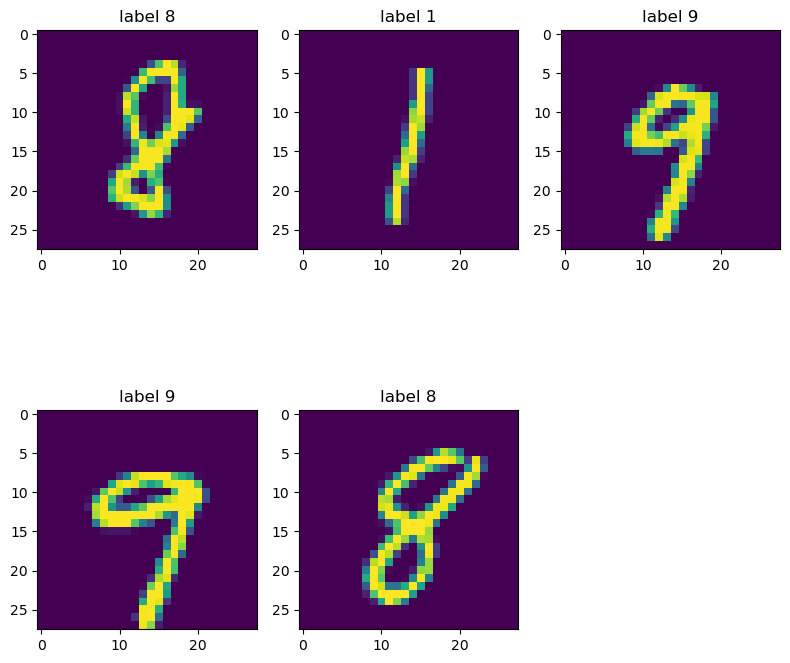

In [46]:
fig,axes=plt.subplots(2,3,figsize=(8,8))
axes=axes.flatten()

for i in range(5):
    cur=axes[i]
    cur.imshow(x.iloc[i].values.reshape(28,28))
    cur.set_title(f"label {y.iloc[i]}")

plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()

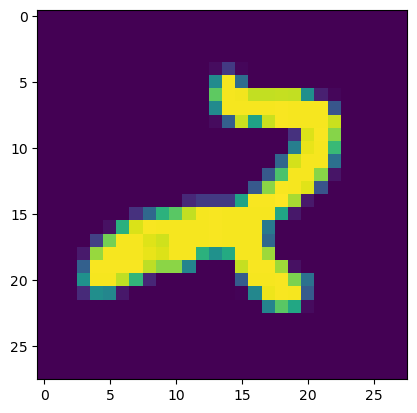

In [47]:
plt.imshow(x.iloc[6].values.reshape(28,28))

In [56]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,p=2)
model.fit(x,y)

KNeighborsClassifier()

In [89]:
#y_predict=model.predict(x)
#y_predict

y_pred = model.predict(x_test)

y_pred[:5]


/home/user/Downloads/yes/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[4 0 2 ... 8 7 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y,y_predict))



[[405   0   0   1   0   0   2   0   0   0]
 [  0 469   1   0   0   0   1   0   0   0]
 [  3  15 387   1   1   0   0   8   4   1]
 [  1   5   3 487   0   3   0   4   1   2]
 [  0   4   0   0 377   0   2   2   0  12]
 [  3   3   0   9   2 317   2   0   1   2]
 [  2   1   0   0   0   4 394   1   0   0]
 [  0  16   1   0   2   0   0 412   0   7]
 [  1   9   1  13   4   7   4   2 353   9]
 [  4   3   2   5   5   0   0   9   0 388]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       408
           1       0.89      1.00      0.94       471
           2       0.98      0.92      0.95       420
           3       0.94      0.96      0.95       506
           4       0.96      0.95      0.96       397
           5       0.96      0.94      0.95       339
           6       0.97      0.98      0.98       402
           7       0.94      0.94      0.94       438
           8       0.98      0.88      0.93       403
           9       0.92     

In [90]:
print(classification_report(y_test,y_predict))

ValueError: Found input variables with inconsistent numbers of samples: [1050, 4200]

In [65]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       408
           1       0.89      1.00      0.94       471
           2       0.98      0.92      0.95       420
           3       0.94      0.96      0.95       506
           4       0.96      0.95      0.96       397
           5       0.96      0.94      0.95       339
           6       0.97      0.98      0.98       402
           7       0.94      0.94      0.94       438
           8       0.98      0.88      0.93       403
           9       0.92      0.93      0.93       416

    accuracy                           0.95      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.95      0.95      0.95      4200



In [66]:
print(accuracy_score(y,y_predict))

0.9497619047619048


In [68]:
y_predict

array([8, 1, 9, ..., 7, 7, 5])

In [ ]:


plt.figure(figsize=(8,8))

for i in range(5):
    plt.subplot(2,3,i+1)
    img = x_test.iloc[i].values.reshape(28,28)
    plt.imshow(img,cmap="gray")
    plt.title(f"Predict label : {y_pred[i]}")

plt.tight_layout()
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'values'

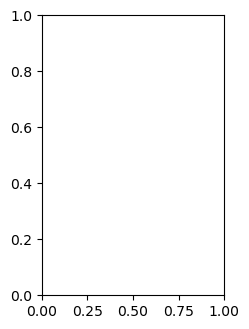

In [79]:
plt.figure(figsize=(8,8))
#axes=axes.flatten()

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test.iloc[i].values.reshape(28,28))
    #cur.set_title(f"label {y.iloc[i]}")

#plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()

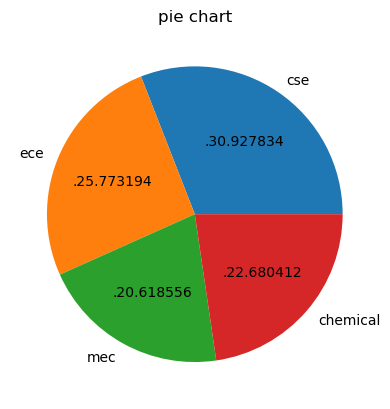

In [4]:
from matplotlib import pyplot as plt
rgukt_branches=["cse","ece","mec","chemical"]
students=[300,250,200,220]
plt.title("pie chart")
plt.pie(students,labels=rgukt_branches,autopct=".%2f")
plt.show()